In [109]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import keys
from config import w_api_key
from config import gkey

# Import citipy module
# Be sure to be in PythonData where this installed to have this work
from citipy import citipy

# Output file
output_data_file = "output_data/cities.csv"

# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [40]:
# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

5

In [41]:
cities

['camacha', 'hilo', 'erdaojiang', 'maymyo', 'puerto ayora']

In [96]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities[2]


# Build query URL
query_url = url + "appid=" + w_api_key + "&q=" + city

# Hooray!  I'm talking to the data source and my call is working.

In [97]:
# Ok how am I getting information out of the json/results?
city_data_test = requests.get(query_url).json()
city_data_test["clouds"]["all"]

75

In [67]:
# Set up dataframe to hold data from Open Weather

weather_data = pd.DataFrame({
    "City": cities
})

# Add empty columns to fill
weather_data["Lat"] = ""
weather_data["Long"] = ""
weather_data["Max Temp"] = ""
weather_data["Humidity"] = ""
weather_data["Cloudiness"] = ""
weather_data["Wind Speed"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""

weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,camacha,,,,,,,,
1,hilo,,,,,,,,
2,erdaojiang,,,,,,,,
3,maymyo,,,,,,,,
4,puerto ayora,,,,,,,,


In [98]:
# Set up a for loop to go through the weather_data dataframe
# to look for data for each city
# params = {degrees = farenheit}

base_url = url + "appid=" + w_api_key + "&q=" 

for index, row in weather_data.iterrows():
    
    # Get the city name from the df
    name = row["City"]
    
    # Add city to url
    print(f"Retrieving data for {index}: {name}.")
    response = requests.get(base_url + name).json()
    
#     print(response)
    
    # Extract data
    results = response
    print(results["coord"]["lat"])
    
    try:
        print("Proof of entry into try block")
        weather_data.loc[index, "Lat"] = results["coord"]["lat"]
        weather_data.loc[index, "Long"] = results["coord"]["lon"]
        weather_data.loc[index, "Max Temp"] = results["main"]["temp_max"]
        weather_data.loc[index, "Humidity"] = results["main"]["humidity"]
        weather_data.loc[index, "Cloudiness"] = results["clouds"]["all"]
        weather_data.loc[index, "Wind Speed"] = results["wind"]["speed"]
        weather_data.loc[index, "Country"] = results["sys"]["country"]
        weather_data.loc[index, "Date"] = results["dt"]
        
    except:
        pass


Retrieving data for 0: camacha.
33.0833
Proof of entry into try block
Retrieving data for 1: hilo.
19.7297
Proof of entry into try block
Retrieving data for 2: erdaojiang.
41.7764
Proof of entry into try block
Retrieving data for 3: maymyo.
22.0333
Proof of entry into try block
Retrieving data for 4: puerto ayora.
-0.7393
Proof of entry into try block


In [99]:
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,camacha,33.0833,-16.3333,289.15,88,75,6.69,PT,1612752909
1,hilo,19.7297,-155.09,298.15,61,75,3.6,US,1612752909
2,erdaojiang,41.7764,126.032,261.54,87,95,1.86,CN,1612752664
3,maymyo,22.0333,96.4667,293.15,64,40,1.03,MM,1612752909
4,puerto ayora,-0.7393,-90.3518,297.59,95,99,2.58,EC,1612752909


In [103]:
# Export weather_data to csv
# This file is a place holder for proof of concept.
# Update with full data set later

weather_data.to_csv("Working_data.csv", index=False)

In [ ]:
# Make a heck ton of scatter plots

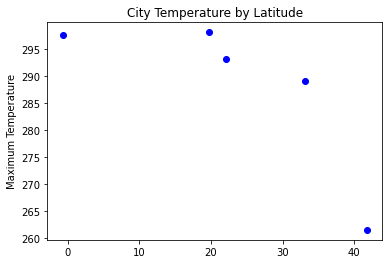

In [123]:
# Temperature vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot (x, temp_y, "bo")
plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")
plt.show()

# Why won't my plt.xlabel work????

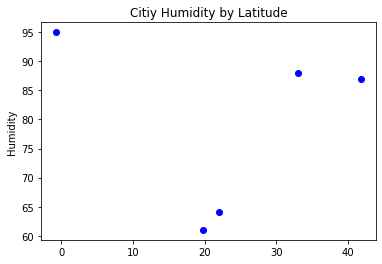

In [127]:
# Humidity vs Latitude
humid_y = weather_data["Humidity"]

plt.plot(x, humid_y, "bo")
plt.ylabel("Humidity")
# plt.xlabel("Latitude")
plt.title("Citiy Humidity by Latitude")
plt.show()

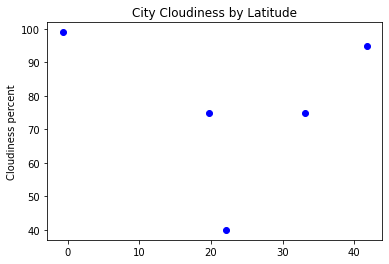

In [128]:
# Cloudiness vs Latitude
cloud_y = weather_data["Cloudiness"]

plt.plot(x, cloud_y, "bo")
plt.ylabel("Cloudiness percent")
plt.title("City Cloudiness by Latitude")
plt.show()

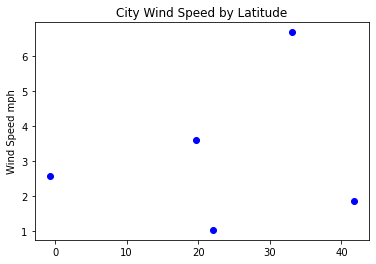

In [130]:
# Wind Speed by Latitude
wind_y = weather_data["Wind Speed"]

plt.plot(x, wind_y, "bo")
plt.ylabel("Wind Speed mph")
plt.title("City Wind Speed by Latitude")
plt.show()